**TASK-2 :  Iris Flower Classification**
       
       Author : Shilu Pradhan

       Domain : Data Science

       Aim : To develop a model that can classify iris flowers into different species.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.simplefilter('ignore')


Download Dataset

In [48]:
iris = pd.read_csv("E:\codsoft intern\Task_3_Iris_flower_Prediction\IRIS.csv")
iris_points = iris.iloc[:,1:4]
labels=iris.iloc[:,4]

In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We can see that all values are 0.it means that there are no null values over the entire data frame.
The target labels of this dataset are present in the species column,lets have quick look at the target labels.

In [53]:
print("Taget Labels",iris["species"].unique())

Taget Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Visualization

In [54]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

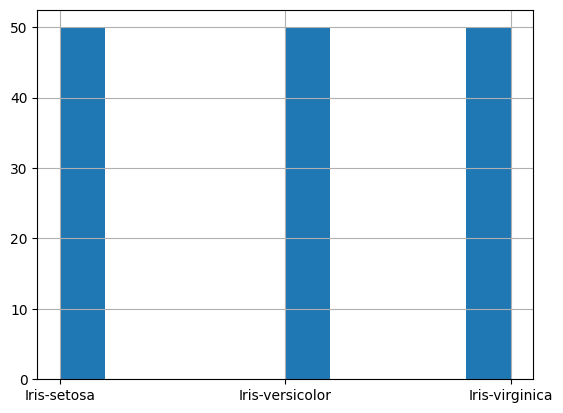

In [55]:
iris['species'].hist()

Split Data info Testing and Training Data

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris_points,labels,test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
standard_obj = StandardScaler()
standard_obj.fit(x_train)
x_train_std = standard_obj.transform(x_train)
x_test_std = standard_obj.transform(x_test)

Applying Classification ML model

SVM(Support Vector Machine)

In [58]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state = 0,gamma=.10,C =1.0)
svm.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std,y_test)*100))

Training data accuracy 98.33
Testing data accuracy 93.33


KNN(K-Nearest Neighbors)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=7,p=2,metric = "minkowski")
Knn.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(Knn.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(Knn.score(x_test_std,y_test)*100))

Training data accuracy 97.50
Testing data accuracy 96.67


Decision Tree

In [60]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')
decision_tree.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std,y_test)*100))


Training data accuracy 100.00
Testing data accuracy 96.67


Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier()
random_forest.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format( random_forest.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format( random_forest.score(x_test_std,y_test)*100))


Training data accuracy 100.00
Testing data accuracy 93.33


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  7]], dtype=int64)

In [64]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.67


we can see accuracy of model is 96.67 percent which is very accurate